## 타이타닉 생존자 예측 모델

- 탑승객 정보를 기반으로, 해당 탑승객의 생존 여부를 예측!!

In [ ]:
# 데이터 로드

import pandas as pd

df_train = pd.read_csv('train.csv')
df_train.head(3)

df_test = pd.read_csv('test.csv')
df_test.head(3)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q

In [ ]:
# EDA (Exploratory Data Analysis)

print(df_train.columns) # label 데이터 존재 O ('Survived')
print(df_test.columns) # label 테이터 존재 X

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
print(df_train.shape)
print(df_test.shape)

(891, 12)
(418, 11)


In [ ]:
print(df_train.info)
print('--------------------------------------')
print(df_test.info)

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [ ]:
# null 데이터 갯수 체크

print(df_train.isna().sum())
print('--------------------------------------')
print(df_test.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# 어떤 컬럼을 살리고, 어떤 컬럼을 지울 것인가? => 시각화를 통해서 진행

# 시각화하는 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

# 컬럼의 특징에 따른 생존자와 사망자의 막대 그래프
def bar_chart(column_name):

    # 생존자
    survived = df_train[df_train['Survived'] == 1][column_name].value_counts() # value_counts() : unique value를 통해 갯수 파악
    # 사망자
    dead = df_train[df_train['Survived'] == 0][column_name].value_counts()

    df_merged = pd.DataFrame({'Survived':survived, 'Dead':dead})
    df_merged.plot(kind='bar', stacked=True, figsize=(12,8))

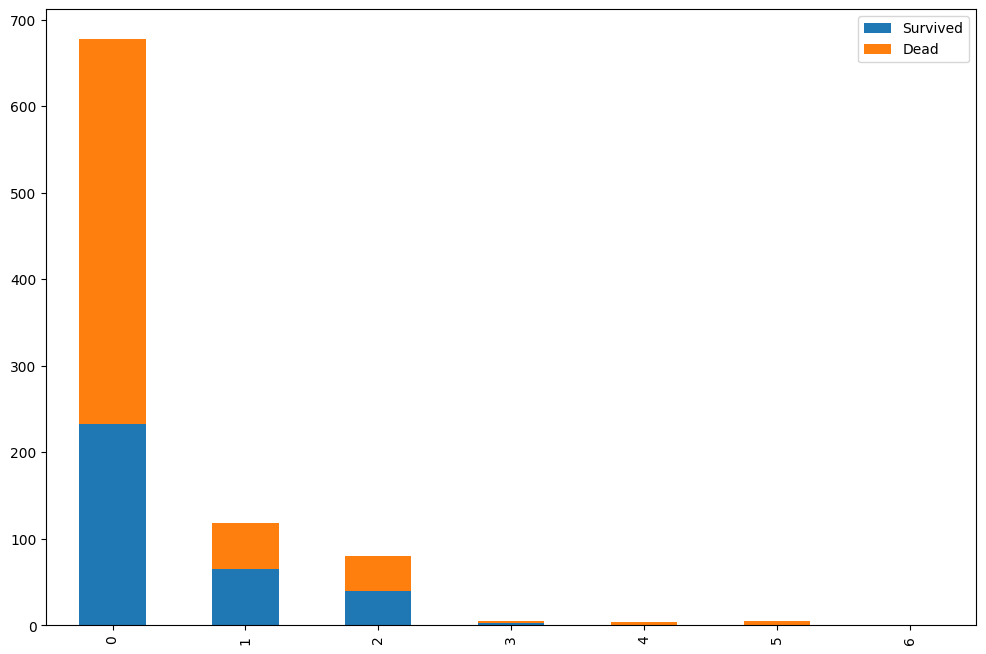

In [ ]:
# 질문 던지기 => 어떤 컬럼이 생존 확률에 영향을 미칠까?
bar_chart('Parch')

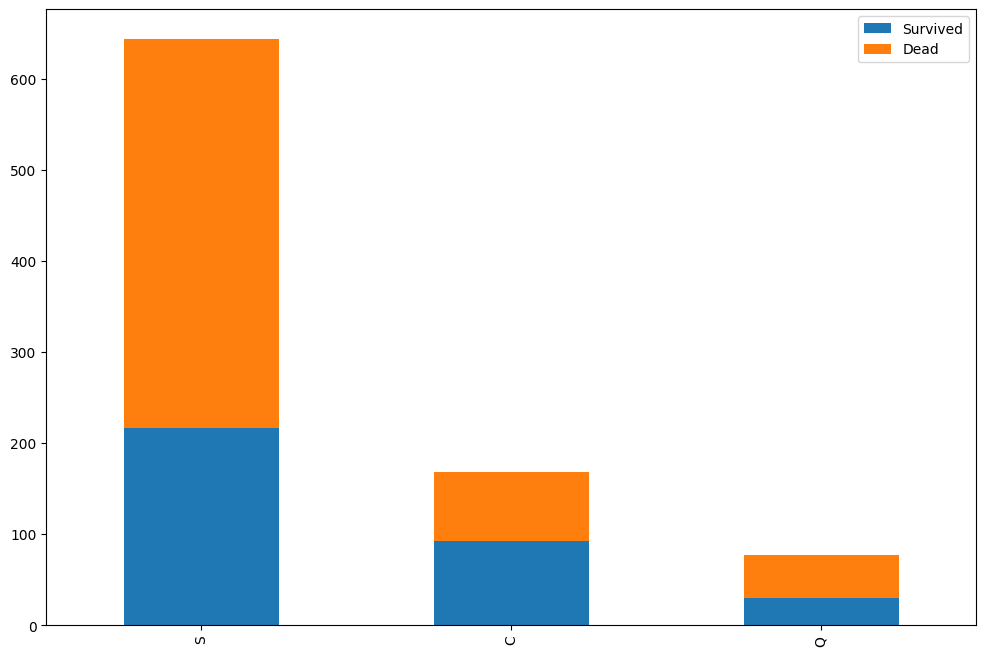

In [ ]:
bar_chart('Embarked')

In [ ]:
# 가장 많은 요금을 낸 상위 10명의 생존율

df_train.sort_values(by='Fare', ascending=False).head(10)['Survived'].value_counts()

# 가장 적은 요금을 낸 10명의 생존율

df_train.sort_values(by='Fare', ascending=False).tail(10)['Survived'].value_counts()

0    10
Name: Survived, dtype: int64

In [ ]:
# 이름이 생존 확률에 끼치는 영향

train_test_data = [df_train, df_test]

for data in train_test_data:
    data['Name'] = data['Name'].str.extract('([A-Za-z]+)\.')

In [ ]:
df_train['Name'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64

In [ ]:
# 문자열 데이터를 숫자형 데이터로 변경

name_mapping = {
    'Mr' : 0, 'Miss' : 1, 'Mrs' : 2, 'Master' : 3, 'Dr' : 4, 'Rev' : 3
}

# train_data와 test_data 둘 다 다뤄야하기 때문
for data in train_test_data:
    data['Name'] = data['Name'].map(name_mapping)

In [ ]:
df_train['Name'].value_counts()

0.0    517
1.0    182
2.0    125
3.0     46
4.0      7
Name: Name, dtype: int64

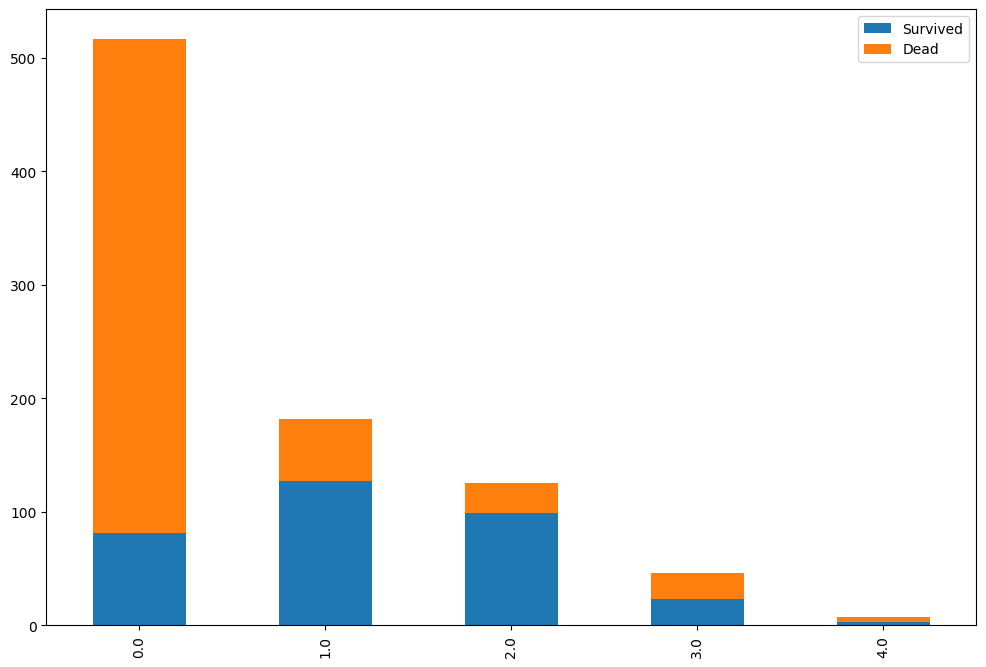

In [ ]:
bar_chart('Name')

In [ ]:
# 성별

df_train['Sex'] = df_train['Sex'].replace({'male' : 0, 'female' : 1})
df_test['Sex'] = df_test['Sex'].replace({'male' : 0, 'female' : 1})

In [ ]:
df_train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [ ]:
# 나이

df_train['Age'].isna().sum() # 나이 데이터가 부분적으로 비어있다.

# groupby 해준 값들을 dataframe에 담아줄 때 transform 함수를 사용하는데, 이때 값을 채워줄 때 mean이라는 평균 데이터로 넣어달라 해주는 거임
# 어쨌든 groupby 값을 mean이라는 평균 데이터로 transform 해서 변형했기 때문에, inplace=True 해주기
df_train['Age'].fillna(df_train.groupby('Name')['Age'].transform('mean'), inplace=True) # 대괄호 뒤에 나오는 함수들을 호출할 때 소괄호 사용

In [ ]:
df_train['Age'].isna().sum() # 0 : null이 없다.

0

In [ ]:
# 나중을 위해 test data도 변형해주기
df_test['Age'].fillna(df_test.groupby('Name')['Age'].transform('mean'), inplace=True)

In [ ]:
df_test['Age'].isna().sum() # 1 : null 존재 O

1

In [ ]:
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

In [ ]:
df_test['Age'].isna().sum()

0

In [ ]:
# Age 데이터 스케일링 -> 피쳐 엔지니어링
# 나이 데이터의 편차 줄이기

import numpy as np

age_bins = [0, 16, 32, 55, np.inf] # np.inf : 무한대
age_labels = [0, 1, 2, 3] # 구간

for data in train_test_data:
    data['Age'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

In [ ]:
df_train['Age'].value_counts()

1    382
2    365
0    104
3     40
Name: Age, dtype: int64

In [ ]:
# SibSp, Parch

for data in train_test_data:
    data['Family'] = data['SibSp'] + data['Parch'] + 1 # + 1 : 나

In [ ]:
df_train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [ ]:
# Fare

fare_bins = [0, 20, 100, 1000]
fare_labels = [0, 1, 2] # 구간

for data in train_test_data:
    data['Fare'] = pd.cut(data['Fare'], bins=fare_bins, labels=fare_labels)

In [ ]:
df_train['Fare'].value_counts()

0    500
1    323
2     53
Name: Fare, dtype: int64

In [ ]:
# Embarked

df_train['Embarked'] = df_train['Embarked'].replace({'S' : 0, 'C' : 1, 'Q' : 2})
df_test['Embarked'] = df_test['Embarked'].replace({'S' : 0, 'C' : 1, 'Q' : 2})

In [ ]:
# df_test['Age'].fillna(0, inplace=True)
df_test['Age'].isna().sum()

0

In [ ]:
df_train['Embarked'].fillna(0, inplace=True)
df_train['Embarked'].isna().sum()

0

In [ ]:
# df_test['Embarked'].fillna(0, inplace=True)
df_test['Embarked'].isna().sum()

0

In [ ]:
drop_train_cols = ['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']

df_train_final = df_train.drop(drop_train_cols, axis=1)
df_train_final

Survived  Pclass  Name  Sex Age Fare  Embarked  Family
0           0       3   0.0    0   1    0       0.0       2
1           1       1   2.0    1   2    1       1.0       2
2           1       3   1.0    1   1    0       0.0       1
3           1       1   2.0    1   2    1       0.0       2
4           0       3   0.0    0   2    0       0.0       1
..        ...     ...   ...  ...  ..  ...       ...     ...
886         0       2   3.0    0   1    0       0.0       1
887         1       1   1.0    1   1    1       0.0       1
888         0       3   1.0    1   1    1       0.0       4
889         1       1   0.0    0   1    1       1.0       1
890         0       3   0.0    0   1    0       2.0       1

[891 rows x 8 columns]

In [ ]:
drop_test_cols = ['SibSp', 'Parch', 'Ticket', 'Cabin'] # PassengerId는 나중에 제출해여 해서 살려둠

df_test_final = df_test.drop(drop_test_cols, axis=1)
df_test_final

PassengerId  Pclass  Name  Sex Age Fare  Embarked  Family
0            892       3   0.0    0   2    0         2       1
1            893       3   2.0    1   2    0         0       2
2            894       2   0.0    0   3    0         2       1
3            895       3   0.0    0   1    0         0       1
4            896       3   2.0    1   1    0         0       3
..           ...     ...   ...  ...  ..  ...       ...     ...
413         1305       3   0.0    0   1    0         0       1
414         1306       1   NaN    1   2    2         1       1
415         1307       3   0.0    0   2    0         0       1
416         1308       3   0.0    0   1    0         0       1
417         1309       3   3.0    0   0    1         1       3

[418 rows x 8 columns]

In [ ]:
df_train_final.fillna(0, inplace=True)
df_train_final.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
Fare        0
Embarked    0
Family      0
dtype: int64

In [ ]:
df_test_final.fillna(0, inplace=True)
df_test_final.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
Fare           0
Embarked       0
Family         0
dtype: int64

In [ ]:
features = df_train_final.drop('Survived', axis=1)
labels = df_train_final['Survived']

In [ ]:
# 모델링

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [ ]:
# KFold로 데이터 나누기

kfold = KFold(n_splits=10, shuffle=True, random_state=123)

In [ ]:
# DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
scores = cross_val_score(dt_clf, features, labels, cv=kfold, scoring='accuracy')

print(np.mean(scores) * 100)

80.24094881398251


In [ ]:
# KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, features, labels, cv=kfold, scoring='accuracy')

print(np.mean(scores) * 100)

79.23345817727841


In [ ]:
# RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5)
scores = cross_val_score(rf, features, labels, cv=kfold, scoring='accuracy')

print(np.mean(scores) * 100)

80.91385767790263


In [ ]:
# GaussianNB

gb = GaussianNB()
scores = cross_val_score(gb, features, labels, cv=kfold, scoring='accuracy')

print(np.mean(scores) * 100)

80.35705368289638


In [ ]:
# SVC

svc = SVC()
scores = cross_val_score(svc, features, labels, cv=kfold, scoring='accuracy')

print(np.mean(scores) * 100)

83.04744069912608


In [ ]:
# SVC 알고리즘을 사용해서 최종 결과값 도출

svc.fit(features, labels)

SVC()

In [ ]:
# 수능시험

test_data = df_test_final.drop('PassengerId', axis=1)
test_data # 수능문제

Pclass  Name  Sex Age Fare  Embarked  Family
0         3   0.0    0   2    0         2       1
1         3   2.0    1   2    0         0       2
2         2   0.0    0   3    0         2       1
3         3   0.0    0   1    0         0       1
4         3   2.0    1   1    0         0       3
..      ...   ...  ...  ..  ...       ...     ...
413       3   0.0    0   1    0         0       1
414       1   0.0    1   2    2         1       1
415       3   0.0    0   2    0         0       1
416       3   0.0    0   1    0         0       1
417       3   3.0    0   0    1         1       3

[418 rows x 7 columns]

In [ ]:
# 문제 예측하기

pred = svc.predict(test_data)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# 제출

# 제출할 데이터
df_final_submit = pd.DataFrame({
    'PassengerId' : df_test_final['PassengerId'],
    'Survived' : pred
})

df_final_submit.set_index('PassengerId', inplace=True)

In [ ]:
df_final_submit.to_csv('submission.csv')

In [ ]:
df_final_submit

Survived
PassengerId          
892                 0
893                 1
894                 0
895                 0
896                 1
...               ...
1305                0
1306                1
1307                0
1308                0
1309                1

[418 rows x 1 columns]